# Análise da diferença salarial para trabalhadores de TI distribuídos em todos os setores produtivos.


Aqui é realizado as análises de quantidade de pessoas, da massa salarial e diferença salarial entre homens e mulheres

com funções trabalhistas de TI distribuídos em qualquer setor produtivo na cidade de Sorocaba, em um recorte de 2012, 2013 e 2014.

## Etapas iniciais comuns para os três anos da análise:


### Imports necessários para realização dos processamentos e análises:

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu

# Opções gerais necessárias:

pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [17]:
# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Criando indices dos sexos para utilização posterior:
sexo = {1: 'M', 2: 'F'}

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

### Etapa de leitura dos dados das tabelas em CSV para 2012, 2013 e 2014:

In [22]:
# Leitura da tabela de dados gerais para 2012:

RAIS_2012 = pd.read_csv("../data/SP2012.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_2012.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE', 'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [25]:
# Leitura da tabela de dados gerais para 2013:
RAIS_2013 = pd.read_csv("../data/SP2013.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_2013.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE', 'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [36]:
# Leitura da tabela de dados gerais para 2014:
RAIS_2014 = pd.read_csv("../data/SP2014.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_2014.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE', 'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [44]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2012 (data dos dados para 2012) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2012 = 1.94801240

RAIS_2012["Remuneração"] = RAIS_2012["Remuneração"] * fator_correcao_inflacao_2012

# Índice de correção de inflação para o período de 12/2013 (data dos dados para 2013) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2013 = 1.84499480

RAIS_2013["Remuneração"] = RAIS_2013["Remuneração"] * fator_correcao_inflacao_2013

# Índice de correção de inflação para o período de 12/2014 (data dos dados para 2014) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2014 = 1.73509650

RAIS_2014["Remuneração"] = RAIS_2014["Remuneração"] * fator_correcao_inflacao_2014

### Exibição das tabelas gerais para cada ano:

In [48]:
# Exibindo os cinco primeiros dados da tabela de 2012:
RAIS_2012.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,212420,62031,4,6,26,355220,2,"9,467.34",1
1,317110,62015,6,6,41,355220,2,"2,115.54",1
2,317115,62015,5,7,39,355220,9,"2,142.81",1
3,317110,62091,3,7,21,355220,2,"4,234.98",1
4,212420,63119,4,7,26,355220,9,"4,371.34",1


In [51]:
# Exibindo os cinco primeiros dados da tabela de 2013:
RAIS_2013.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,142510,62015,4,5,28,355220,9,"7,542.34",1
1,317110,62015,3,7,21,355220,9,"2,770.55",1
2,212420,62040,6,7,45,355220,2,"3,160.29",1
3,212420,62040,6,7,49,355220,2,"16,904.32",1
4,212420,62040,5,7,30,355220,4,"2,844.28",1


In [54]:
# Exibindo os cinco primeiros dados da tabela de 2014:
RAIS_2014.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,212420,62091,3,2,18,355220,2,"2,630.94",1
1,317105,62015,5,6,34,355220,9,"2,236.50",1
2,317105,62015,3,6,20,355220,9,"2,342.38",1
3,317110,62015,4,6,25,355220,9,"2,654.54",1
4,317110,62091,4,7,28,355220,2,"3,520.11",1


### Filtro da tabela geral de cada ano para separação em tabelas por sexo:

In [59]:
# Filtrando os dados em tabelas separadas pada sexo masculino e feminino (2012):
RAIS_2012_masculino = RAIS_2012.query("Sexo == 1")
RAIS_2012_feminino = RAIS_2012.query("Sexo == 2")

# Filtrando os dados em tabelas separadas pada sexo masculino e feminino (2013):
RAIS_2013_masculino = RAIS_2013.query("Sexo == 1")
RAIS_2013_feminino = RAIS_2013.query("Sexo == 2")

# Filtrando os dados em tabelas separadas pada sexo masculino e feminino (2014):
RAIS_2014_masculino = RAIS_2014.query("Sexo == 1")
RAIS_2014_feminino = RAIS_2014.query("Sexo == 2")

## Análise dos dados para o ano de 2012:

### Visualização e análise da distribuição da variável remuneração (2012):

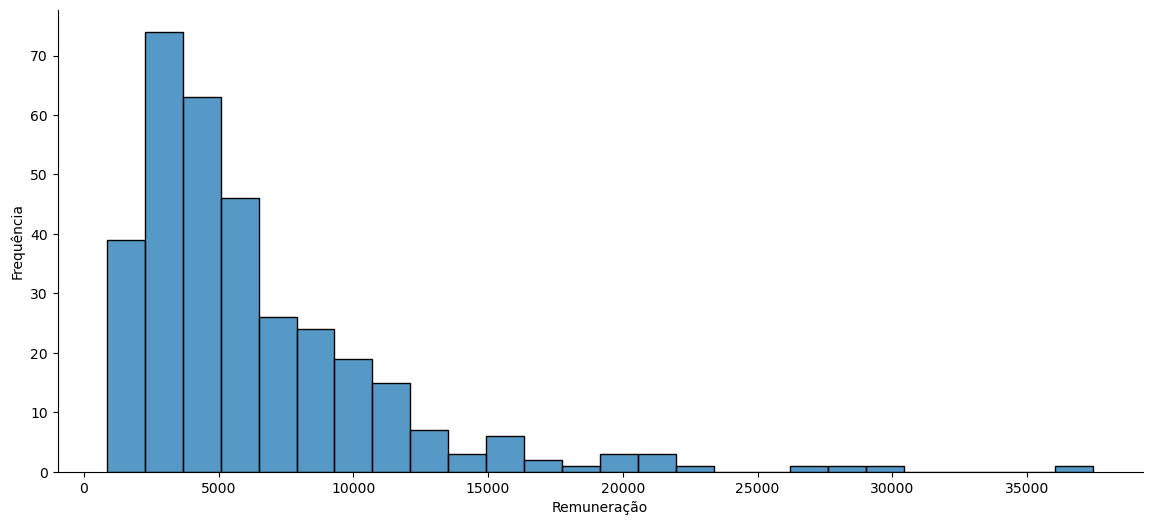

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)

hist = sns.histplot(RAIS_2012.Remuneração)
sns.despine()
hist.set_ylabel('Frequência')

fig.savefig("./figures/svg/hist_remuneracao_geral_2012.svg")

Como pode ser observado no gráfico acima, a distribuição da variável principal não parece seguir uma distribuição normal, apresentando um forte achatamento à esquerda.

Esse fenômeno reflete o comportamento das remunerações no país, onde a maioria da população recebe salários mais próximos de zero do que de 35 mil, em virtude do cenário desfavorável de distribuição de renda.

Abaixo, são apresentados exemplos que ilustram a desproporção de renda nos dados utilizados neste trabalho.

In [69]:
print("Soma dos salários dos trabalhadores 1% mais ricos: {}".format(RAIS_2012.Remuneração[RAIS_2012.Remuneração > RAIS_2012.Remuneração.quantile(0.99)].sum()))
print("Quantidade de trabalhadores 1% mais ricos: {}".format(RAIS_2012.Remuneração[RAIS_2012.Remuneração > RAIS_2012.Remuneração.quantile(0.99)].count()))

print()

print("Soma dos salários dos trabalhadores 27,9% mais pobres, aproximadamente: {}".format(RAIS_2012.Remuneração[RAIS_2012.Remuneração < RAIS_2012.Remuneração.quantile(0.2793)].sum()))
print("Quantidade de trabalhadores 27,9% mais pobres: {}".format(RAIS_2012.Remuneração[RAIS_2012.Remuneração < RAIS_2012.Remuneração.quantile(0.2793)].count()))

Soma dos salários dos trabalhadores 1% mais ricos: 123450.31841838
Quantidade de trabalhadores 1% mais ricos: 4

Soma dos salários dos trabalhadores 27,9% mais pobres, aproximadamente: 231256.03237161602
Quantidade de trabalhadores 27,9% mais pobres: 94


Logo, o salário somado de todas as 4 pessoas mais ricas em funções trabalhistas de TI é aproximadamente de 123 mil reais. Enquanto são necessárias 94 pessoas de menor renda para, no total, termos o equivalente salarial dos 1% mais ricos, demonstrando que a desigualdade de renda é observada, não somente no país como um todo, mas também nas ocupações de TI.

Para garantir que a distribuição não é normal, é necessário realizar alguns testes de normalidade. Isso é importante para que, mais adiante, seja possível comparar as médias (dos salários entre sexos) corretamente. Caso a distribuição seja normal, são utilizados testes específicos para a comparação; caso não seja normal, deve-se utilizar uma abordagem não paramétrica.

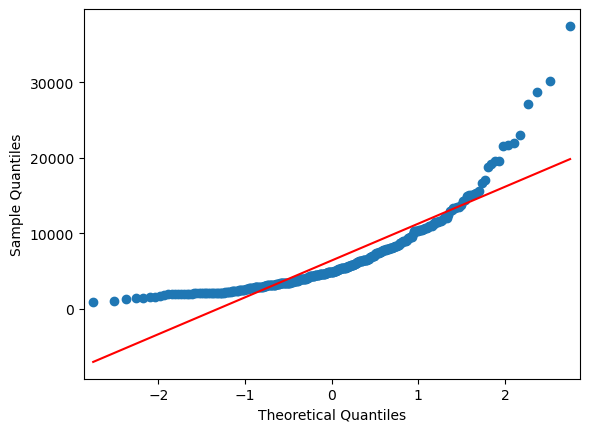

In [71]:
qqplot(RAIS_2012.Remuneração, line='s')
plt.show()

No gráfico acima, podemos observar visualmente que a distribuição provavelmente não é normal, pois as bordas da linha azul ficam bem distantes da linha vermelha. Para uma indicação de normalidade, essa linha deveria estar o mais próxima possível da linha vermelha.

Para concluir estatisticamente que a distribuição da variável remuneração não é normal, é necessário realizar um teste de normalidade.

In [82]:
# Realização do teste de Shapiro considerando o nível de confiança de 0.01:
n_amostra = min(5000, len(RAIS_2012))  # Ajusta o tamanho da amostra
stat, p_valor = shapiro(RAIS_2012.sample(n_amostra).Remuneração)
print('Estatística Shapiro = {:.5f}, p-valor = {:.5f}'.format(stat, p_valor))

if p_valor > nivel_confianca:
    print('A amostra parece ser Gaussiana (falha ao rejeitar H0)')
else:
    print('A amostra não parece ser Gaussiana (rejeitar H0)')

Estatística Shapiro = 0.78202, p-valor = 0.00000
A amostra não parece ser Gaussiana (rejeitar H0)


Ao realizar o teste de normalidade acima, obtivemos um p-valor de 0.00000, o que nos leva, ao nível de confiança de 0.01%, a rejeitar a hipótese nula de que a distribuição é normal. Como o p-valor é inferior ao nível de confiança estabelecido, podemos concluir que a distribuição não segue uma distribuição normal.

### Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres (2012):


In [90]:
# Pegando a quantidade de homens e mulheres nos dados:

qnt_masculino = RAIS_2012_masculino.Remuneração.count()
qnt_feminino = RAIS_2012_feminino.Remuneração.count()

print("Quantidade trabalhadores masculinos: {}.\n" \
      "Quantidade trabalhadores femininos: {}.\n" \
      "São aproximadamente {:.2f} mais homens que mulheres.".format(qnt_masculino, qnt_feminino, qnt_masculino / qnt_feminino))

Quantidade trabalhadores masculinos: 266.
Quantidade trabalhadores femininos: 70.
São aproximadamente 3.80 mais homens que mulheres.


Com as quantidades de cada sexo capturadas, podemos observar que há uma disparidade significativa entre homens e mulheres atuando no setor de TI em 2012. Aproximadamente, há 3,80 vezes mais homens do que mulheres nesse setor.

Isso evidencia a baixa participação das mulheres nesse nicho de mercado no país, o que é reforçado por diversos pontos discutidos na bibliografia inicial deste trabalho.

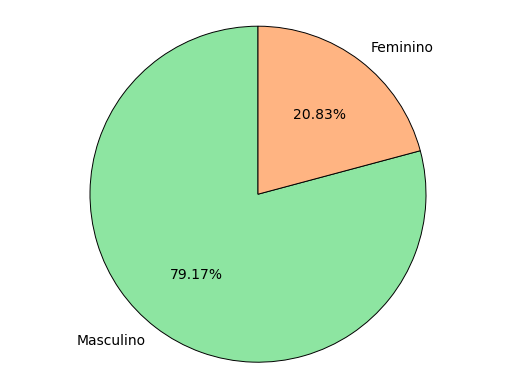

In [92]:
freq_fig, freq_ax = plt.subplots()
freq_ax.pie([qnt_masculino, qnt_feminino], labels = ("Masculino", "Feminino"), 
            autopct = '%1.2f%%', startangle = 90, colors = (color_masc, color_fem),
            wedgeprops={"edgecolor":"0",'linewidth': 0.7, 'antialiased': True})
freq_ax.axis('equal')

freq_fig.savefig("./figures/svg/qnt_sexo_pie_geral_2012.svg")

No gráfico acima podemos visualizar de forma geral tal distribuição.

### Análise da massa salarial de homens e mulheres (2012):


In [97]:
# Pegando a massa salarial de homens e mulheres nos dados:

massa_salarial_masculino = RAIS_2012_masculino.Remuneração.sum()
massa_salarial_feminino = RAIS_2012_feminino.Remuneração.sum()

print("Massa salarial trabalhadores masculinos: {:.2f}.\n" \
      "Massa salarial trabalhadores femininos: {:.2f}.\n" \
      "A massa salarial dos homens é {:.2f} vezes maior que das mulheres.".format(massa_salarial_masculino, massa_salarial_feminino, massa_salarial_masculino / massa_salarial_feminino))

Massa salarial trabalhadores masculinos: 1756305.79.
Massa salarial trabalhadores femininos: 392636.08.
A massa salarial dos homens é 4.47 vezes maior que das mulheres.


A massa salarial normalmente reflete a proporção entre o número de homens e mulheres; no entanto, observamos uma discrepância neste caso.

Enquanto a proporção de homens para mulheres é de 3,80 para 1, a massa salarial dos homens é 4,47 vezes maior que a das mulheres, o que representa uma diferença de 0,67 em relação à proporção de quantidade.

Essa análise preliminar sugere que pode haver diferenças salariais significativas na média entre os sexos.

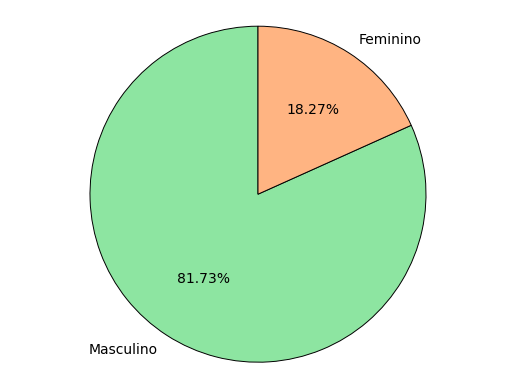

In [99]:
freq_fig, freq_ax = plt.subplots()
freq_ax.pie([massa_salarial_masculino, massa_salarial_feminino], labels = ("Masculino", "Feminino"), 
            autopct = '%1.2f%%', startangle = 90, colors = (color_masc, color_fem),
            wedgeprops={"edgecolor":"0",'linewidth': 0.7, 'antialiased': True})
freq_ax.axis('equal')

freq_fig.savefig("./figures/svg/massa_sexo_pie_geral_2012.svg")

No gráfico de pizza anterior a este, referente as quantidades de cada sexo, temos as porcentagens: masculino com 79.17% e feminino com 20.83%. Ao comparar com o gráfico da massa salarial (acima), temos os respectivos valores para homens e mulheres: 81.33% e 18.27%, demonstrando visualmente uma possível diferença salarial entre os sexos, em desfavorecimento as mulheres.

Para concluirmos melhor esta possibilidade, a seguir é realizado uma análise das médias salariais em cada sexo e comparadas.

### Análise das médias salariais e diferenças (2012):


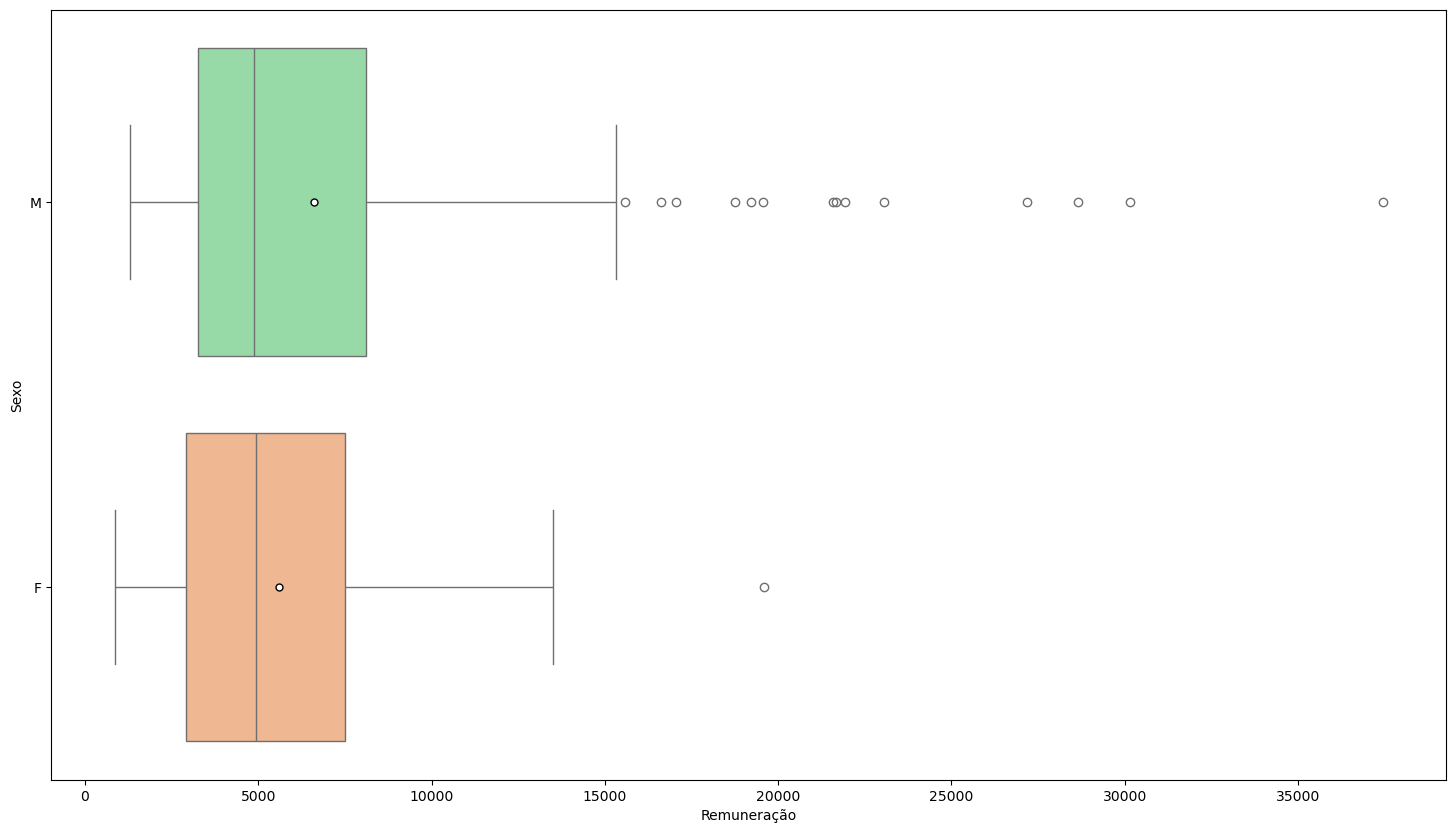

In [111]:
RAIS_2012["Sexo"] = RAIS_2012["Sexo"].replace(sexo)

box = sns.boxplot(x='Remuneração', y='Sexo', data=RAIS_2012, orient='h',
                  showmeans=True, meanprops={"marker": "o", "markerfacecolor": "white", 
                  "markeredgecolor": "black", "markersize": "5"},
                  palette={"M": color_masc, "F": color_fem},
                  hue='Sexo')  # Adicionando hue

box.figure.set_size_inches(18, 10)

box.figure.savefig("./figures/png/boxplot_geral_2012.png", dpi=300)

In [113]:
# Capturando as médias e medianas

media_masculino = RAIS_2012_masculino.Remuneração.mean()
mediana_masculino = RAIS_2012_masculino.Remuneração.median()

media_feminino = RAIS_2012_feminino.Remuneração.mean()
mediana_feminino = RAIS_2012_feminino.Remuneração.median()

# Exibindo os dados: 

print("Masculino:")
print("Média das remunerações: R$ {:.2f}\n" \
      "Mediana das remunerações: R$ {:.2f}".format(media_masculino, mediana_masculino))

print()

print("Feminino:")
print("Média das remunerações: R$ {:.2f}\n" \
      "Mediana das remunerações: R$ {:.2f}".format(media_feminino, mediana_feminino))

print()

# Tirando os percentuais de diferença:

dif_salarial_media = media_masculino - media_feminino
taxa_dif_media = ((media_feminino - media_masculino) / media_masculino) * 100

dif_salarial_mediana = mediana_masculino - mediana_feminino
taxa_dif_mediana = ((mediana_feminino - mediana_masculino) / mediana_masculino) * 100

print("Diferença salarial média: R$ {:.2f}\n" \
      "Variação percentual média: {:.2f} %\n".format(dif_salarial_media, taxa_dif_media))

print("Diferença salarial mediana: R$ {:.2f}\n" \
      "Variação percentual mediana: {:.2f} %".format(dif_salarial_mediana, taxa_dif_mediana))

Masculino:
Média das remunerações: R$ 6602.65
Mediana das remunerações: R$ 4870.03

Feminino:
Média das remunerações: R$ 5609.09
Mediana das remunerações: R$ 4935.51

Diferença salarial média: R$ 993.57
Variação percentual média: -15.05 %

Diferença salarial mediana: R$ -65.48
Variação percentual mediana: 1.34 %


Ao analisarmos as médias salariais de cada sexo, observamos que as mulheres recebem, em média, 15,05% a menos que os homens no ano de 2012, considerando um recorte dos dados para ocupações na área de TI. Essa diferença indica claramente uma desigualdade salarial em que as mulheres estão em desvantagem em relação aos homens.

Para validar essa observação e afirmar que as diferenças salariais são estatisticamente significativas, é fundamental realizar um teste de hipótese entre os dois grupos. Esse teste permitirá determinar se as médias salariais realmente diferem entre homens e mulheres de forma estatisticamente significativa, reforçando ou refutando a conclusão inicial sobre a desigualdade salarial.

### Teste de hipótese para as mediana (2012):


Para verificar se a mediana dos salários das mulheres é menor que a dos homens, utilizaremos o teste não paramétrico de Mann-Whitney. Esse teste é adequado porque os grupos não são pareados e as suposições de normalidade não são atendidas nos dados de remuneração. Essa análise ajudará a entender as disparidades salariais na área de TI.

In [125]:
stat, p_valor = mannwhitneyu(RAIS_2012_feminino.Remuneração, RAIS_2012_masculino.Remuneração, alternative = 'less')

print("Estatística Mann-Whitney = {:.2f}, p-valor = {:.15f}".format(stat, p_valor))

if p_valor <= nivel_confianca:
    print('A mediana salarial das mulheres é menor que a mediana dos homens (rejeitar H0)')
else:
    print('As medianas não são diferentes (falha ao rejeitar H0)')

Estatística Mann-Whitney = 8672.50, p-valor = 0.189180582975009
As medianas não são diferentes (falha ao rejeitar H0)


Ao rejeitar a hipótese nula do teste de Mann-Whitney, que sugere a ausência de diferenças entre as medianas, podemos concluir que a mediana salarial feminina é estatisticamente menor que a mediana salarial masculina. Isso evidencia que as diferenças salariais observadas são significativas e sustentam a realidade dessa disparidade no mercado de trabalho.

## Análise dos dados para o ano de 2013:

### Visualização e análise da distribuição da variável remuneração (2013):


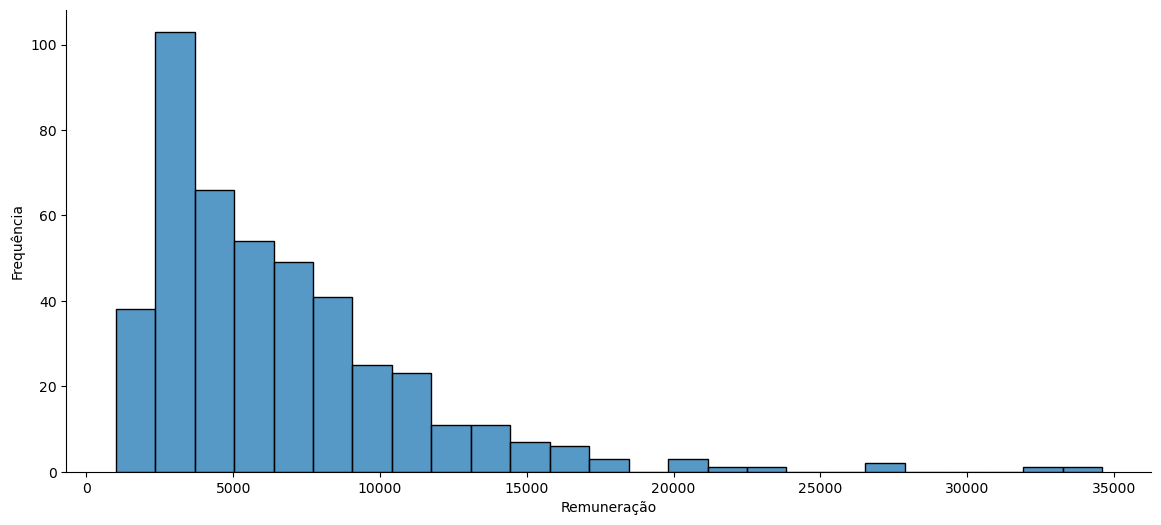

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)

hist = sns.histplot(RAIS_2013.Remuneração)
sns.despine()
hist.set_ylabel('Frequência')

fig.savefig("./figures/svg/hist_remuneracao_geral_2013.svg")

Como podemos observar no gráfico acima, a distribuição da variável principal provavelmente não é normal, apresentando um forte achatamento à esquerda.

Esse fenômeno reflete a realidade das remunerações no país, onde a maior parte da população recebe salários mais próximos de 0 do que de 35 mil, em decorrência da desigualdade na distribuição de renda.

A seguir, são apresentados dados que ilustram essa desproporção salarial.

In [133]:
print("Soma dos salários dos trabalhadores 1% mais ricos: {}".format(RAIS_2013.Remuneração[RAIS_2013.Remuneração > RAIS_2013.Remuneração.quantile(0.99)].sum()))
print("Quantidade de trabalhadores 1% mais ricos: {}".format(RAIS_2013.Remuneração[RAIS_2013.Remuneração > RAIS_2013.Remuneração.quantile(0.99)].count()))

print()

print("Soma dos salários dos trabalhadores 24% mais pobres, aproximadamente: {}".format(RAIS_2013.Remuneração[RAIS_2013.Remuneração < RAIS_2013.Remuneração.quantile(0.245)].sum()))
print("Quantidade de trabalhadores 24% mais pobres: {}".format(RAIS_2013.Remuneração[RAIS_2013.Remuneração < RAIS_2013.Remuneração.quantile(0.245)].count()))

Soma dos salários dos trabalhadores 1% mais ricos: 144520.56442802
Quantidade de trabalhadores 1% mais ricos: 5

Soma dos salários dos trabalhadores 24% mais pobres, aproximadamente: 279644.40429010795
Quantidade de trabalhadores 24% mais pobres: 110


Dessa forma, o salário total das 5 pessoas mais ricas que atuam em funções trabalhistas de TI é aproximadamente 144 mil reais. Em contrapartida, são necessárias 110 pessoas com os menores salários para igualar o total dos 1% mais ricos, evidenciando que a desigualdade de renda se manifesta não apenas em nível nacional, mas também nas ocupações de TI.

Para verificar se a distribuição é normal, é essencial realizar testes de normalidade. Isso é fundamental para que, posteriormente, possamos comparar corretamente as médias salariais entre os sexos. Se a distribuição for normal, utilizaremos testes específicos para essa comparação; caso contrário, adotaremos uma abordagem não paramétrica.

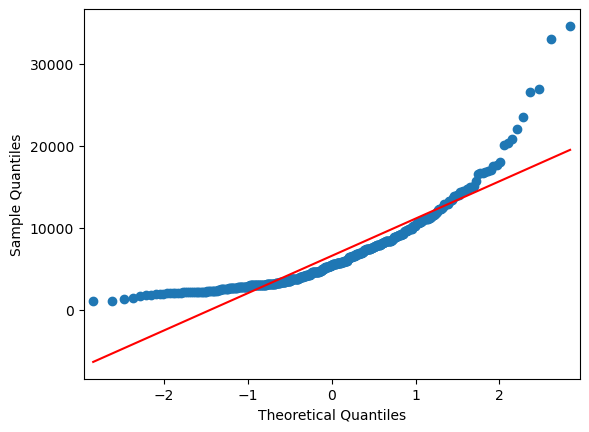

In [136]:
qqplot(RAIS_2013.Remuneração, line='s')
plt.show()

No gráfico acima, podemos inferir visualmente que a distribuição não segue uma normal, já que as extremidades da linha azul distam consideravelmente da linha vermelha. Para que a distribuição fosse considerada normal, essa linha precisaria estar o mais próximo possível da linha vermelha.

Portanto, é crucial realizar um teste de normalidade para confirmar estatisticamente se a distribuição da variável remuneração realmente não é normal.

In [139]:
# Realização do teste de Shapiro considerando o nível de confiança de 0.01:
n_amostra = min(5000, len(RAIS_2013))  # Ajusta o tamanho da amostra
stat, p_valor = shapiro(RAIS_2013.sample(n_amostra).Remuneração)
print('Estatística Shapiro = {:.5f}, p-valor = {:.5f}'.format(stat, p_valor))

if p_valor > nivel_confianca:
    print('A amostra parece ser Gaussiana (falha ao rejeitar H0)')
else:
    print('A amostra não parece ser Gaussiana (rejeitar H0)')

Estatística Shapiro = 0.82093, p-valor = 0.00000
A amostra não parece ser Gaussiana (rejeitar H0)


Ao realizar o teste de normalidade acima, temos como saída um p-valor 0.00000, da qual, ao nível de confiança de 0.01% rejeitamos a hipótese nula de que a distribuição é normal, visto que o p-valor não é maior do que o nível de confiança definido. Logo, podemos concluir que a distribuição não é normal.

Sabendo disto, para comparação das médias salariais será necessário utilizar métodos de comparação não paramétricos.

### Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres (2013):


In [146]:
# Pegando a quantidade de homens e mulheres nos dados:

qnt_masculino = RAIS_2013_masculino.Remuneração.count()
qnt_feminino = RAIS_2013_feminino.Remuneração.count()

print("Quantidade trabalhadores masculinos: {}.\n" \
      "Quantidade trabalhadores femininos: {}.\n" \
      "São aproximadamente {:.2f} mais homens que mulheres.".format(qnt_masculino, qnt_feminino, qnt_masculino / qnt_feminino))

Quantidade trabalhadores masculinos: 363.
Quantidade trabalhadores femininos: 83.
São aproximadamente 4.37 mais homens que mulheres.


Com as quantidades de cada sexo capturadas, podemos verificar que existem muitos mais homens do que mulheres trabalhando com TI no ano de 2013. Aproximadamente temos 4.37 vezes mais homens que mulheres.

Isto demonstra como existe uma baixa participação de mulheres neste nicho de mercado no país, visto diversos pontos levantados na bibliografia inicial deste trabalho.

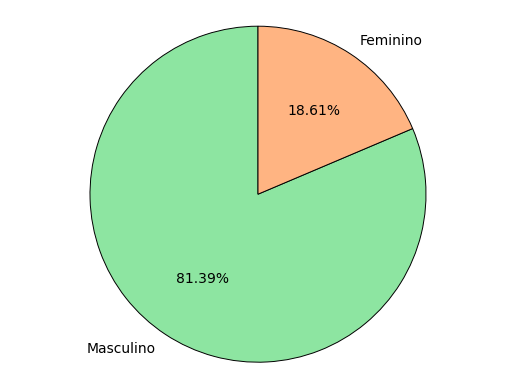

In [149]:
freq_fig, freq_ax = plt.subplots()
freq_ax.pie([qnt_masculino, qnt_feminino], labels = ("Masculino", "Feminino"), 
            autopct = '%1.2f%%', startangle = 90, colors = (color_masc, color_fem),
            wedgeprops={"edgecolor":"0",'linewidth': 0.7, 'antialiased': True})
freq_ax.axis('equal')

freq_fig.savefig("./figures/svg/qnt_sexo_pie_geral_2013.svg")

No gráfico acima podemos visualizar de forma geral tal distribuição.

### Análise da massa salarial de homens e mulheres (2013):


In [154]:
# Pegando a massa salarial de homens e mulheres nos dados:

massa_salarial_masculino = RAIS_2013_masculino.Remuneração.sum()
massa_salarial_feminino = RAIS_2013_feminino.Remuneração.sum()

print("Massa salarial trabalhadores masculinos: {:.2f}.\n" \
      "Massa salarial trabalhadores femininos: {:.2f}.\n" \
      "A massa salarial dos homens é {:.2f} vezes maior que das mulheres.".format(massa_salarial_masculino, massa_salarial_feminino, massa_salarial_masculino / massa_salarial_feminino))

Massa salarial trabalhadores masculinos: 2422092.31.
Massa salarial trabalhadores femininos: 498145.04.
A massa salarial dos homens é 4.86 vezes maior que das mulheres.


A massa salarial costuma seguir a mesma tendência que a proporção entre homens e mulheres, mas encontramos uma discrepância neste cenário.

Analisando a relação entre os sexos, observamos que há 4,37 homens para cada mulher. No entanto, ao examinarmos a massa salarial, notamos que a remuneração total dos homens é 4,86 vezes maior do que a das mulheres, representando uma diferença de 0,49 em relação à proporção de quantidade.

Isso sugere que, à primeira vista, existem diferenças salariais significativas entre os gêneros.

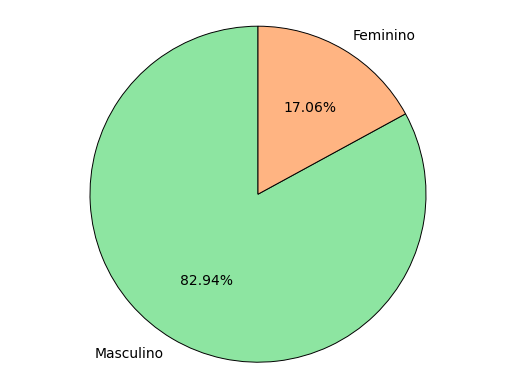

In [157]:
freq_fig, freq_ax = plt.subplots()
freq_ax.pie([massa_salarial_masculino, massa_salarial_feminino], labels = ("Masculino", "Feminino"), 
            autopct = '%1.2f%%', startangle = 90, colors = (color_masc, color_fem),
            wedgeprops={"edgecolor":"0",'linewidth': 0.7, 'antialiased': True})
freq_ax.axis('equal')

freq_fig.savefig("./figures/svg/massa_sexo__pie_geral_2013.svg")

No gráfico de pizza anterior, que mostra a distribuição por sexo, as porcentagens são de 81,39% para os homens e 18,61% para as mulheres. Quando comparamos esses números com o gráfico da massa salarial, que apresenta os valores de 82,94% para os homens e 17,02% para as mulheres, é possível observar visualmente uma diferença salarial significativa entre os gêneros, com as mulheres em desvantagem.

Para aprofundar essa análise e confirmar essa disparidade, realizaremos a comparação das médias salariais de cada sexo.

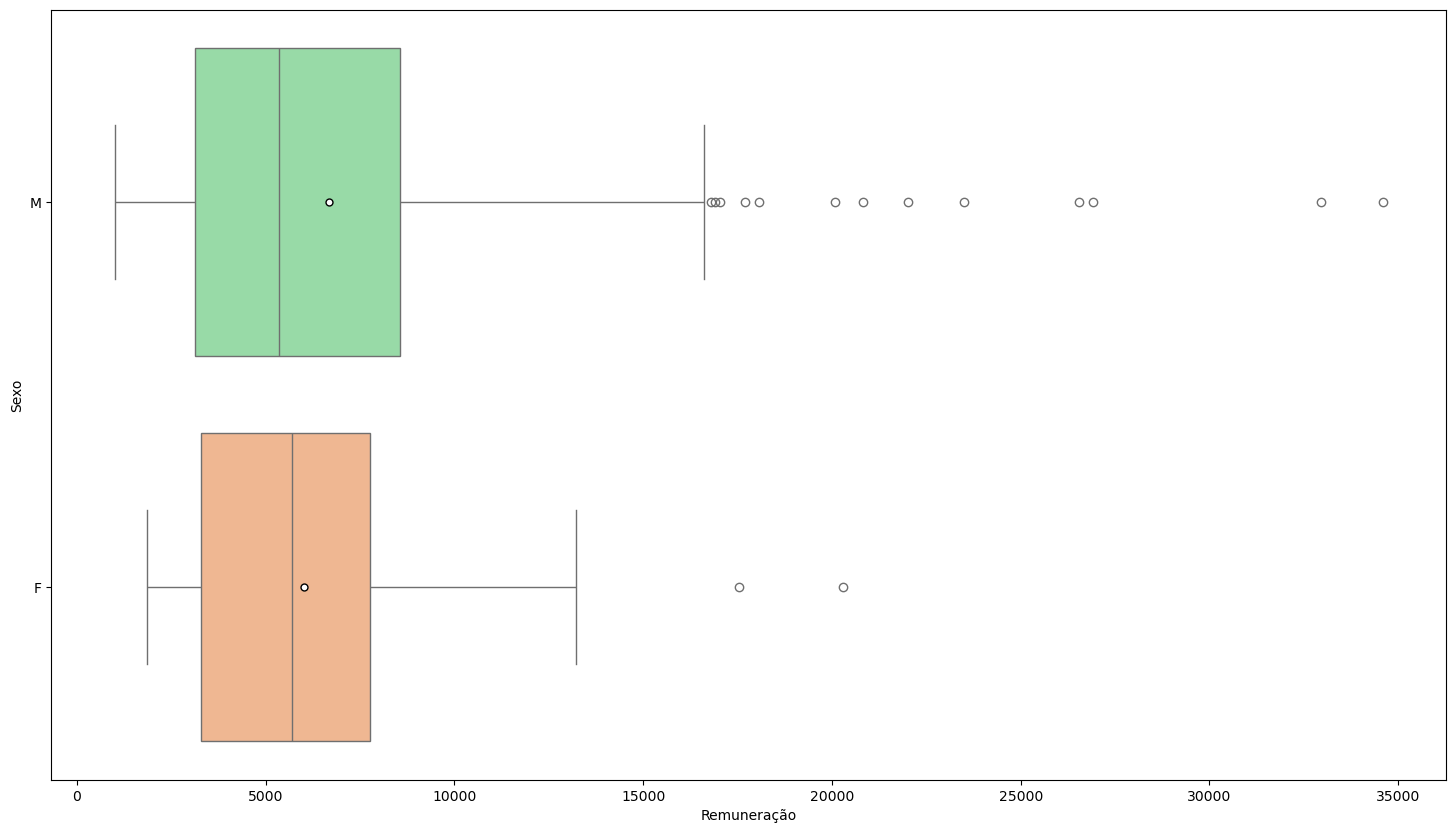

In [162]:
RAIS_2013["Sexo"] = RAIS_2013["Sexo"].replace(sexo)

box = sns.boxplot(x='Remuneração', y='Sexo', data=RAIS_2013, orient='h',
                  showmeans=True, meanprops={"marker": "o", "markerfacecolor": "white", 
                  "markeredgecolor": "black", "markersize": "5"},
                  palette={"M": color_masc, "F": color_fem},
                  hue='Sexo')  # Adicionando hue

box.figure.set_size_inches(18, 10)

box.figure.savefig("./figures/png/boxplot_geral_2013.png", dpi=300)

In [164]:
# Capturando as médias e medianas

media_masculino = RAIS_2013_masculino.Remuneração.mean()
mediana_masculino = RAIS_2013_masculino.Remuneração.median()

media_feminino = RAIS_2013_feminino.Remuneração.mean()
mediana_feminino = RAIS_2013_feminino.Remuneração.median()

# Exibindo os dados: 

print("Masculino:")
print("Média das remunerações: R$ {:.2f}\n" \
      "Mediana das remunerações: R$ {:.2f}".format(media_masculino, mediana_masculino))

print()

print("Feminino:")
print("Média das remunerações: R$ {:.2f}\n" \
      "Mediana das remunerações: R$ {:.2f}".format(media_feminino, mediana_feminino))

print()

# Tirando os percentuais de diferença:

dif_salarial_media = media_masculino - media_feminino
taxa_dif_media = ((media_feminino - media_masculino) / media_masculino) * 100

dif_salarial_mediana = mediana_masculino - mediana_feminino
taxa_dif_mediana = ((mediana_feminino - mediana_masculino) / mediana_masculino) * 100

print("Diferença salarial média: R$ {:.2f}\n" \
      "Variação percentual média: {:.2f} %\n".format(dif_salarial_media, taxa_dif_media))

print("Diferença salarial mediana: R$ {:.2f}\n" \
      "Variação percentual mediana: {:.2f} %".format(dif_salarial_mediana, taxa_dif_mediana))

Masculino:
Média das remunerações: R$ 6672.43
Mediana das remunerações: R$ 5345.74

Feminino:
Média das remunerações: R$ 6001.75
Mediana das remunerações: R$ 5702.27

Diferença salarial média: R$ 670.68
Variação percentual média: -10.05 %

Diferença salarial mediana: R$ -356.53
Variação percentual mediana: 6.67 %


Ao analisarmos as médias salariais por sexo, constatamos que, em 2013, as mulheres ganham, em média, 10,05% a menos do que os homens em ocupações de TI. Essa diferença salarial aponta para uma desigualdade entre os gêneros, com as mulheres em desvantagem.

Entretanto, para validar essa diferença de forma estatística, é fundamental realizar um teste de hipótese que compare as médias salariais dos dois grupos, verificando se a média feminina é, de fato, inferior à masculina.

### Teste de hipótese para as medianas (2013):

Para testar se a mediana das mulheres é estatisticamente menor que a mediana dos homens, será utilizado o teste não paramétrico de Mann-Whitney, visto que os grupos não são pareados, ou seja, são grupos que não dependem um do outro.

In [170]:
stat, p_valor = mannwhitneyu(RAIS_2013_feminino.Remuneração, RAIS_2013_masculino.Remuneração, alternative = 'less')

print("Estatística Mann-Whitney = {:.2f}, p-valor = {:.15f}".format(stat, p_valor))

if p_valor <= nivel_confianca:
    print('A mediana salarial das mulheres é menor que a mediana dos homens (rejeitar H0)')
else:
    print('As medianas não são diferentes (falha ao rejeitar H0)')

Estatística Mann-Whitney = 14537.50, p-valor = 0.309591295380548
As medianas não são diferentes (falha ao rejeitar H0)


Ao realizar o teste de Mann-Whitney, o resultado foi uma Estatística Mann-Whitney de 14.537,50 e um p-valor de 0,3096. Com um p-valor superior ao nível de significância adotado, não podemos rejeitar a hipótese nula, que indica que não há diferenças significativas entre as medianas salariais de homens e mulheres. Portanto, estatisticamente, não conseguimos afirmar que a mediana salarial feminina é menor que a mediana salarial masculina, sugerindo que as diferenças observadas podem não ser substancialmente significativas.

## Análise dos dados para o ano de 2014:


### Visualização e análise da distribuição da variável remuneração (2014):

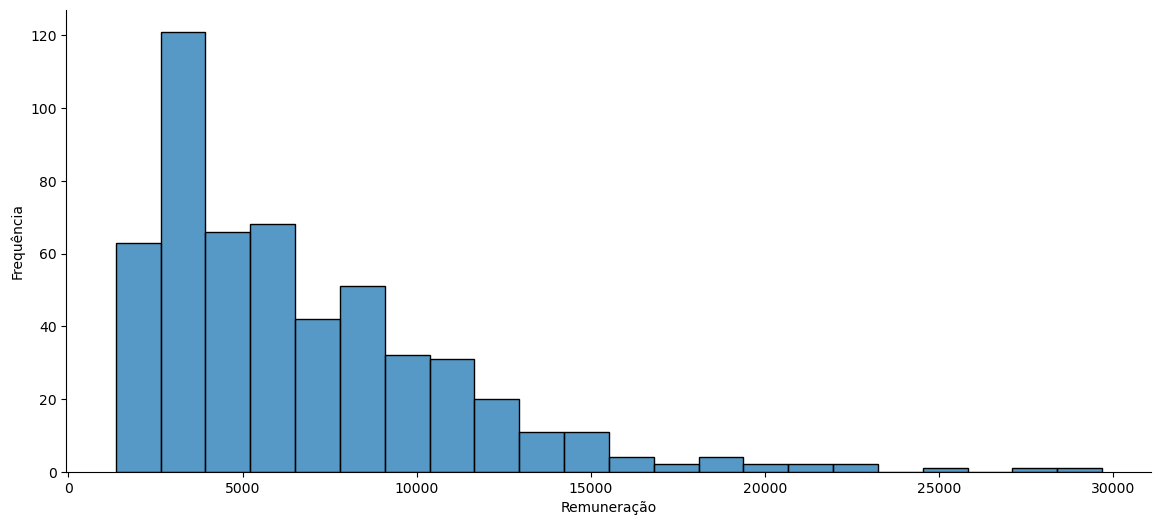

In [176]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)

hist = sns.histplot(RAIS_2014.Remuneração)
sns.despine()
hist.set_ylabel('Frequência')

fig.savefig("./figures/svg/hist_remuneracao_geral_2014.svg")

Como podemos observar no gráfico acima, a distribuição da variável principal provavelmente não segue uma distribuição normal, devido ao seu forte achatamento à esquerda.

Esse padrão reflete o comportamento das remunerações no país, onde a maioria da população recebe salários mais próximos de 0 do que de 30 mil, evidenciando a grave desigualdade na distribuição de renda.

Abaixo, apresentamos uma explicação sobre os dados utilizados neste trabalho e como eles ilustram essa desproporção de renda.

In [181]:
print("Soma dos salários dos trabalhadores 1% mais ricos: {}".format(RAIS_2014.Remuneração[RAIS_2014.Remuneração > RAIS_2014.Remuneração.quantile(0.99)].sum()))
print("Quantidade de trabalhadores 1% mais ricos: {}".format(RAIS_2014.Remuneração[RAIS_2014.Remuneração > RAIS_2014.Remuneração.quantile(0.99)].count()))

print()

print("Soma dos salários dos trabalhadores 24% mais pobres, aproximadamente: {}".format(RAIS_2014.Remuneração[RAIS_2014.Remuneração < RAIS_2014.Remuneração.quantile(0.245)].sum()))
print("Quantidade de trabalhadores 24% mais pobres: {}".format(RAIS_2014.Remuneração[RAIS_2014.Remuneração < RAIS_2014.Remuneração.quantile(0.245)].count()))

Soma dos salários dos trabalhadores 1% mais ricos: 147271.00019805
Quantidade de trabalhadores 1% mais ricos: 6

Soma dos salários dos trabalhadores 24% mais pobres, aproximadamente: 339970.50517068
Quantidade de trabalhadores 24% mais pobres: 131


Logo, o salário total das 6 pessoas mais ricas em funções trabalhistas de TI é aproximadamente 147 mil reais. Para igualar o salário dos 1% mais ricos, seriam necessárias 111 pessoas de menor renda, evidenciando que a desigualdade de renda não é apenas um problema nacional, mas também se reflete nas ocupações de TI.

Para confirmar que a distribuição não é normal, é necessário realizar alguns testes de normalidade. Isso é fundamental para que, posteriormente, possamos comparar corretamente as médias dos salários entre os sexos. Se a distribuição for normal, utilizaremos testes específicos para essa comparação; caso contrário, aplicaremos abordagens não paramétricas.a.

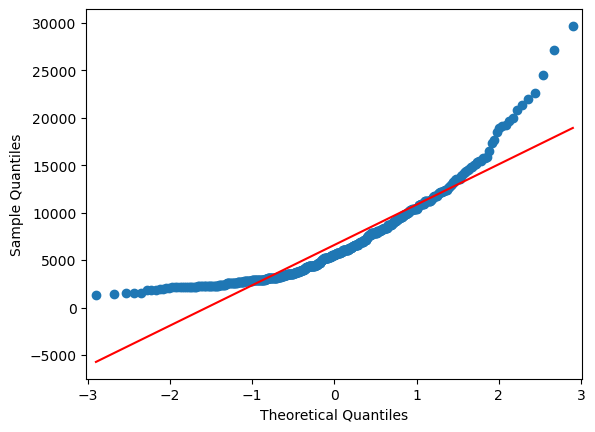

In [186]:
qqplot(RAIS_2014.Remuneração, line='s')
plt.show()

No gráfico acima, podemos sugerir visualmente que a distribuição não é normal, pois as bordas da linha azul estão distantes da linha vermelha. Para que pudéssemos concluir que a distribuição é normal, a linha azul deveria estar o mais próximo possível da linha vermelha.

Porém, como a linha azul se afasta da linha vermelha, isso indica a necessidade de realizar um teste de normalidade para confirmar estatisticamente que a distribuição da variável remuneração não é normal.

In [189]:
# Realização do teste de Shapiro considerando o nível de confiança de 0.01:
n_amostra = min(5000, len(RAIS_2014))  # Ajusta o tamanho da amostra
stat, p_valor = shapiro(RAIS_2014.sample(n_amostra).Remuneração)
print('Estatística Shapiro = {:.5f}, p-valor = {:.5f}'.format(stat, p_valor))

if p_valor > nivel_confianca:
    print('A amostra parece ser Gaussiana (falha ao rejeitar H0)')
else:
    print('A amostra não parece ser Gaussiana (rejeitar H0)')

Estatística Shapiro = 0.86541, p-valor = 0.00000
A amostra não parece ser Gaussiana (rejeitar H0)


Ao realizar o teste de normalidade acima, temos como saída um p-valor 0.00000, da qual, ao nível de confiança de 0.01% rejeitamos a hipótese nula de que a distribuição é normal, visto que o p-valor não é maior do que o nível de confiança definido. Logo, podemos concluir que a distribuição não é normal.

### Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres (2014):

In [194]:
# Pegando a quantidade de homens e mulheres nos dados:

qnt_masculino = RAIS_2014_masculino.Remuneração.count()
qnt_feminino = RAIS_2014_feminino.Remuneração.count()

print("Quantidade trabalhadores masculinos: {}.\n" \
      "Quantidade trabalhadores femininos: {}.\n" \
      "São aproximadamente {:.2f} mais homens que mulheres.".format(qnt_masculino, qnt_feminino, qnt_masculino / qnt_feminino))

Quantidade trabalhadores masculinos: 443.
Quantidade trabalhadores femininos: 92.
São aproximadamente 4.82 mais homens que mulheres.


Com as quantidades de cada sexo capturadas, podemos observar que há uma quantidade significativamente maior de homens do que de mulheres atuando no setor de TI em 2014. Aproximadamente, temos 4,82 vezes mais homens do que mulheres.

Esse dado evidencia a baixa participação das mulheres nesse nicho de mercado no país, corroborando diversos pontos levantados na bibliografia inicial deste trabalho.

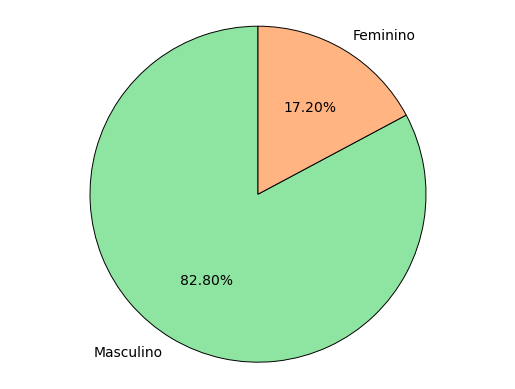

In [197]:
freq_fig, freq_ax = plt.subplots()
freq_ax.pie([qnt_masculino, qnt_feminino], labels = ("Masculino", "Feminino"), 
            autopct = '%1.2f%%', startangle = 90, colors = (color_masc, color_fem),
            wedgeprops={"edgecolor":"0",'linewidth': 0.7, 'antialiased': True})
freq_ax.axis('equal')

freq_fig.savefig("./figures/svg/qnt_sexo_pie_geral_2014.svg")

No gráfico acima podemos visualizar de forma geral tal distribuição.

### Análise da massa salarial de homens e mulheres (2014):


In [201]:
# Pegando a massa salarial de homens e mulheres nos dados:

massa_salarial_masculino = RAIS_2014_masculino.Remuneração.sum()
massa_salarial_feminino = RAIS_2014_feminino.Remuneração.sum()

print("Massa salarial trabalhadores masculinos: {:.2f}.\n" \
      "Massa salarial trabalhadores femininos: {:.2f}.\n" \
      "A massa salarial dos homens é {:.2f} vezes maior que das mulheres.".format(massa_salarial_masculino, massa_salarial_feminino, massa_salarial_masculino / massa_salarial_feminino))

Massa salarial trabalhadores masculinos: 2979925.99.
Massa salarial trabalhadores femininos: 551273.49.
A massa salarial dos homens é 5.41 vezes maior que das mulheres.


A massa salarial costuma refletir a proporção entre a quantidade de homens e mulheres, mas neste caso, notamos uma discrepância.

Ao analisar a proporção entre homens e mulheres, encontramos que há 4,81 homens para cada mulher. No entanto, ao examinarmos a massa salarial, verificamos que a massa salarial dos homens é 5,41 vezes maior do que a das mulheres, o que representa 0,6 vezes a mais do que a proporção de quantidade.

Esse dado sugere, preliminarmente, que existem diferenças salariais na média entre os sexos.

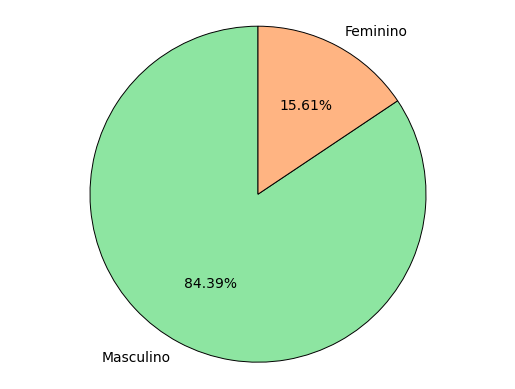

In [204]:
freq_fig, freq_ax = plt.subplots()
freq_ax.pie([massa_salarial_masculino, massa_salarial_feminino], labels = ("Masculino", "Feminino"), 
            autopct = '%1.2f%%', startangle = 90, colors = (color_masc, color_fem),
            wedgeprops={"edgecolor":"0",'linewidth': 0.7, 'antialiased': True})
freq_ax.axis('equal')

freq_fig.savefig("./figures/svg/massa_sexo__pie_geral_2014.svg")

No gráfico de pizza anterior, que mostra as quantidades de cada sexo, observamos que as porcentagens são: masculino com 82,80% e feminino com 17,20%. Ao comparar esses dados com o gráfico da massa salarial, verificamos que os respectivos valores para homens e mulheres são 84,39% e 15,61%. Essa diferença visualmente sugere uma possível desigualdade salarial entre os sexos, prejudicando as mulheres.

Para aprofundar essa análise, será realizada uma comparação das médias salariais entre os sexos.

### Análise das médias salariais e diferenças (2014):


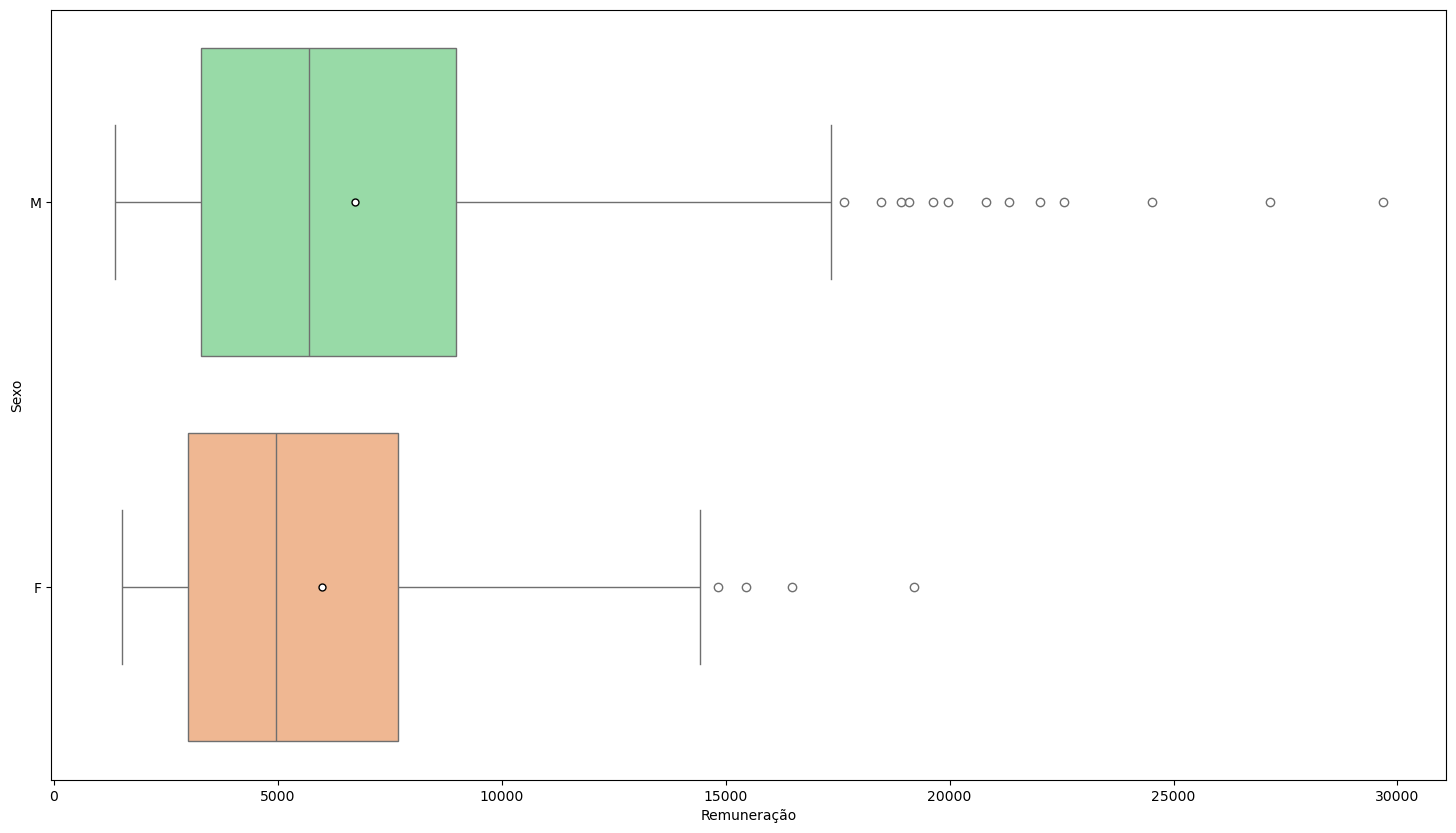

In [208]:
RAIS_2014["Sexo"] = RAIS_2014["Sexo"].replace(sexo)

box = sns.boxplot(x='Remuneração', y='Sexo', data=RAIS_2014, orient='h',
                  showmeans=True, meanprops={"marker": "o", "markerfacecolor": "white", 
                  "markeredgecolor": "black", "markersize": "5"},
                  palette={"M": color_masc, "F": color_fem},
                  hue='Sexo')  # Adicionando hue

box.figure.set_size_inches(18, 10)

box.figure.savefig("./figures/png/boxplot_geral_2014.png", dpi=300)

In [210]:
# Capturando as médias e medianas

media_masculino = RAIS_2014_masculino.Remuneração.mean()
mediana_masculino = RAIS_2014_masculino.Remuneração.median()

media_feminino = RAIS_2014_feminino.Remuneração.mean()
mediana_feminino = RAIS_2014_feminino.Remuneração.median()

# Exibindo os dados: 

print("Masculino:")
print("Média das remunerações: R$ {:.2f}\n" \
      "Mediana das remunerações: R$ {:.2f}".format(media_masculino, mediana_masculino))

print()

print("Feminino:")
print("Média das remunerações: R$ {:.2f}\n" \
      "Mediana das remunerações: R$ {:.2f}".format(media_feminino, mediana_feminino))

print()

# Tirando os percentuais de diferença:

dif_salarial_media = media_masculino - media_feminino
taxa_dif_media = ((media_feminino - media_masculino) / media_masculino) * 100

dif_salarial_mediana = mediana_masculino - mediana_feminino
taxa_dif_mediana = ((mediana_feminino - mediana_masculino) / mediana_masculino) * 100

print("Diferença salarial média: R$ {:.2f}\n" \
      "Variação percentual média: {:.2f} %\n".format(dif_salarial_media, taxa_dif_media))

print("Diferença salarial mediana: R$ {:.2f}\n" \
      "Variação percentual mediana: {:.2f} %".format(dif_salarial_mediana, taxa_dif_mediana))

Masculino:
Média das remunerações: R$ 6726.70
Mediana das remunerações: R$ 5695.02

Feminino:
Média das remunerações: R$ 5992.10
Mediana das remunerações: R$ 4955.33

Diferença salarial média: R$ 734.59
Variação percentual média: -10.92 %

Diferença salarial mediana: R$ 739.69
Variação percentual mediana: -12.99 %


Ao analisarmos as médias salariais para cada sexo, observamos que as mulheres recebem 10,92% a menos que os homens no ano de 2014, com base em um recorte de dados para ocupações de TI. Essa diferença salarial indica uma desigualdade entre homens e mulheres.

Para validar essa comparação estatística, é fundamental realizar um teste de hipótese entre os dois grupos, a fim de verificar se as médias salariais são realmente diferentes, e se essa diferença é estatisticamente significativa.

### Teste de hipótese para as medianas (2014):

Para testar se a mediana das mulheres é estatisticamente menor que a mediana dos homens, será utilizado o teste não paramétrico de Mann-Whitney, visto que os grupos não são pareados, ou seja, são grupos que não dependem um do outro.

In [215]:
stat, p_valor = mannwhitneyu(RAIS_2014_feminino.Remuneração, RAIS_2014_masculino.Remuneração, alternative = 'less')

print("Estatística Mann-Whitney = {:.2f}, p-valor = {:.15f}".format(stat, p_valor))

if p_valor <= nivel_confianca:
    print('A mediana salarial das mulheres é menor que a mediana dos homens (rejeitar H0)')
else:
    print('As medianas não são diferentes (falha ao rejeitar H0)')

Estatística Mann-Whitney = 18231.00, p-valor = 0.055811690517947
As medianas não são diferentes (falha ao rejeitar H0)


Ao realizarmos o teste Mann-Whitney, que testa a hipótese nula de que não há diferenças entre as medianas dos grupos, obtemos um resultado com uma estatística de Mann-Whitney igual a 18231,00 e um p-valor de 0,0558. Como o p-valor é maior que o nível de significância geralmente adotado (0,05), não podemos rejeitar a hipótese nula. Isso indica que não há evidências estatísticas suficientes para afirmar que a mediana salarial feminina é menor que a mediana salarial masculina. Assim, a análise sugere que as diferenças salariais não são estatisticamente significativas, contrariando a suposição inicial de que há uma disparidade salarial entre os sexos.